In [13]:
#### Importing Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()


In [2]:
raw_csv_data=pd.read_csv("index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index("date",inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size=int(len(df_comp)*0.8)
df,df_test=df_comp.iloc[:size],df_comp.iloc[size:]

#### White Noise

In [5]:
wn=np.random.normal(loc=df.market_value.mean(),scale=df.market_value.std(),size=len(df))

In [6]:
df['wn']=wn

C:\Users\tNouali\AppData\Local\Temp\ipykernel_12496\2403461399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn']=wn


In [7]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1098.393132
std,292.559287,293.193531
min,438.920000,109.618761
25%,914.620000,899.383088
50%,1144.650000,1092.080575
75%,1316.280729,1299.329264
max,1570.252238,2214.399338


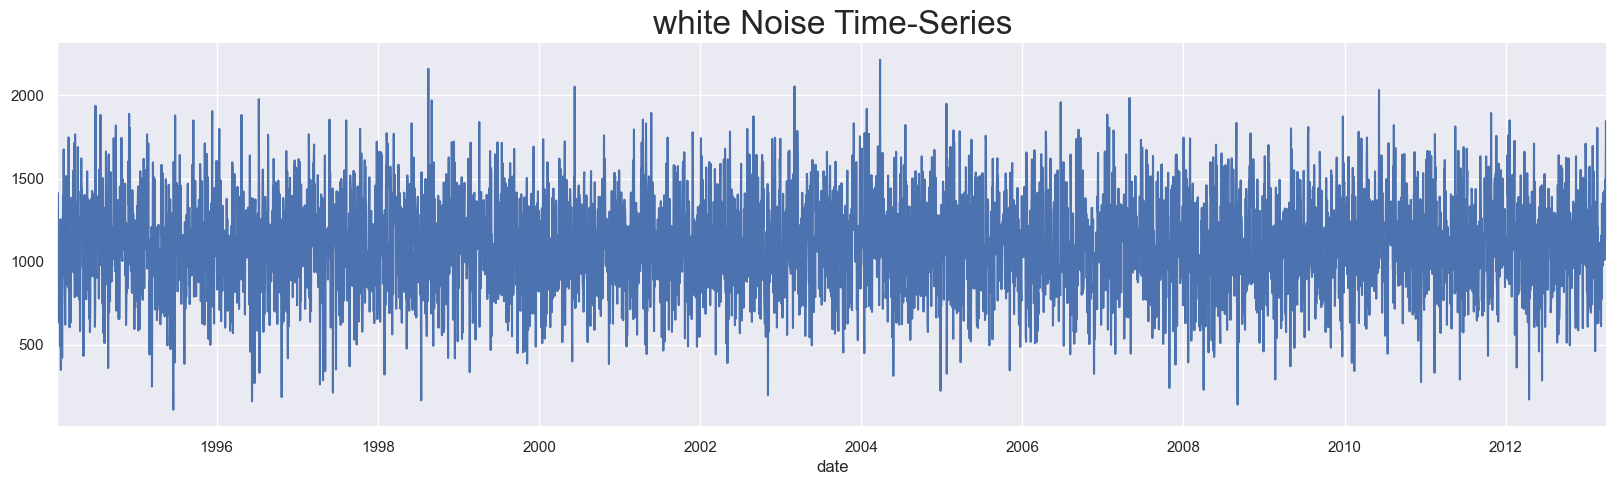

In [10]:
df.wn.plot(figsize=(20,5))
plt.title("white Noise Time-Series",size=24)
plt.show()

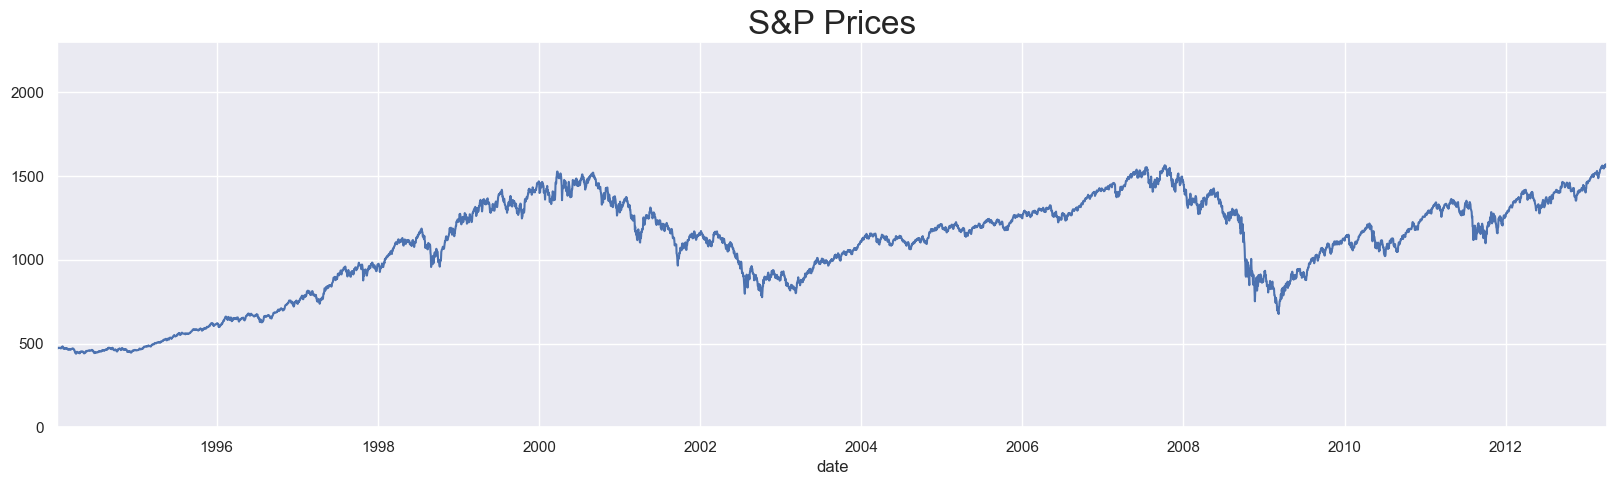

In [12]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices",size=24)
plt.ylim(0,2300)
plt.show()

#### Stationarity

In [14]:
sts.adfuller(df.market_value)

(-1.7369847452352454,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [15]:
sts.adfuller(df.wn)

(-16.060288325677785,
 5.648636217556725e-29,
 19,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 70819.66660819986)

#### Seasonality

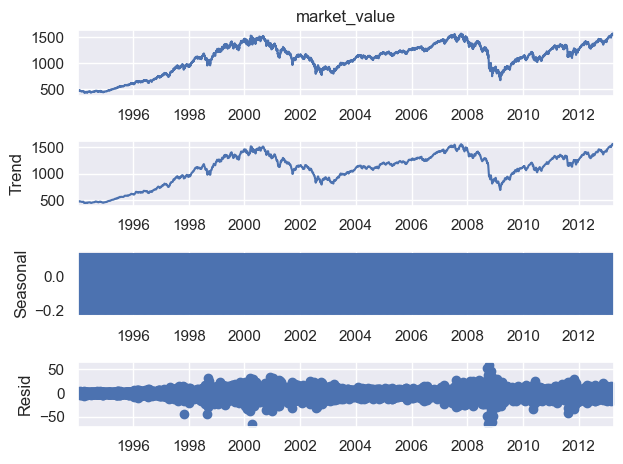

In [16]:
S_dec_additive=seasonal_decompose(df.market_value,model="additive")
S_dec_additive.plot()
plt.show()

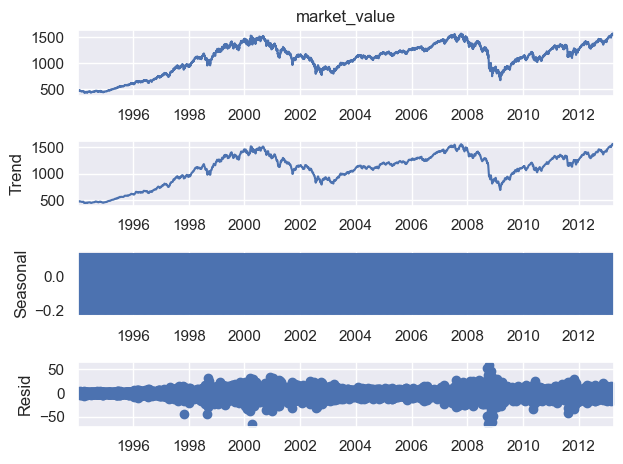

In [17]:
S_dec_multipictive=seasonal_decompose(df.market_value,model="multiplicative")
S_dec_additive.plot()
plt.show()

#### Auto Correlation Function ACF

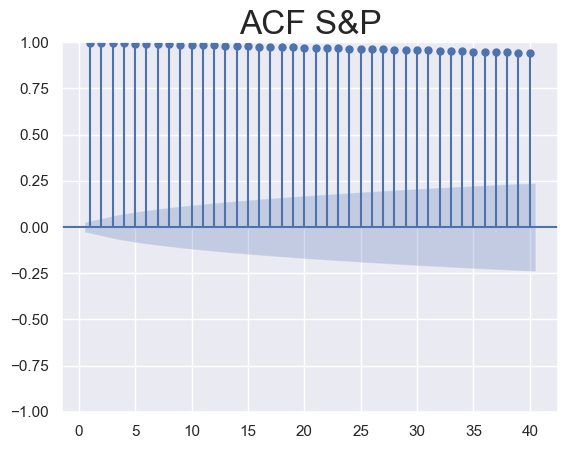

In [18]:
sgt.plot_acf(df.market_value,lags=40,zero=False)
plt.title("ACF S&P",size=24)
plt.show()


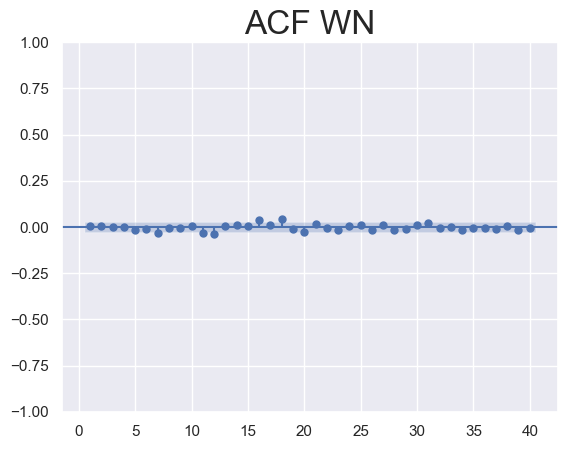

In [19]:
sgt.plot_acf(df.wn,lags=40,zero=False)
plt.title("ACF WN",size=24)
plt.show()

#### PACF

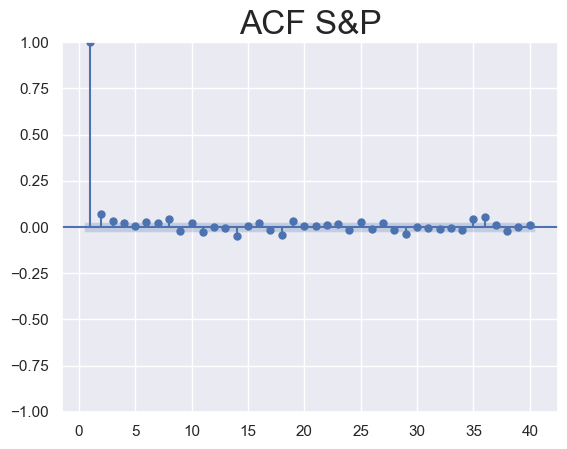

In [21]:
sgt.plot_pacf(df.market_value,lags=40,zero=False,method=('ols'))
plt.title("ACF S&P",size=24)
plt.show()